<a href="https://colab.research.google.com/github/Aaditya2003/Bureau_id/blob/main/bureau_id2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

df_train=pd.read_csv('/content/Assignment_Train.csv')
df_test=pd.read_csv('/content/Assignment_Test.csv')

In [37]:
col=[
        'Cibil Score',
       'TOTAL ASSET COST', 'ASSET CTG', 'APPLIED AMOUNT','MARITAL STATUS', 'GENDER', 'AGE', 'EMPLOY CONSTITUTION', 'EMPLOYER TYPE',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart',

       'Phone Social Premium.jeevansaathi',
       'Phone Social Premium.microsoft',
       'Phone Social Premium.paytm',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi',  'Phone Social Premium.zoho',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status']
col1=[
       'UID', 'Cibil Score',
       'TOTAL ASSET COST', 'ASSET CTG', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE','MARITAL STATUS', 'GENDER', 'AGE', 'EMPLOY CONSTITUTION', 'EMPLOYER TYPE',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart',

       'Phone Social Premium.jeevansaathi',
       'Phone Social Premium.microsoft',
       'Phone Social Premium.paytm',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi',
      'Phone Social Premium.zoho',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall']
df_train=df_train[col]
df_test=df_test[col1]

In [38]:
print(df_train.dtypes)
#print(df_test.dtypes)

Cibil Score                             object
TOTAL ASSET COST                       float64
ASSET CTG                               object
APPLIED AMOUNT                           int64
MARITAL STATUS                          object
GENDER                                  object
AGE                                      int64
EMPLOY CONSTITUTION                     object
EMPLOYER TYPE                           object
Phone Social Premium.amazon            float64
Phone Social Premium.byjus             float64
Phone Social Premium.flipkart          float64
Phone Social Premium.housing           float64
Phone Social Premium.indiamart         float64
Phone Social Premium.jeevansaathi      float64
Phone Social Premium.microsoft         float64
Phone Social Premium.paytm             float64
Phone Social Premium.shaadi            float64
Phone Social Premium.skype             float64
Phone Social Premium.toi               float64
Phone Social Premium.zoho              float64
phone_digital

In [39]:
df_train.isnull().sum()

,0
Cibil Score,4297
TOTAL ASSET COST,5108
ASSET CTG,5108
APPLIED AMOUNT,0
MARITAL STATUS,4894
GENDER,0
AGE,0
EMPLOY CONSTITUTION,4998
EMPLOYER TYPE,4998
Phone Social Premium.amazon,1916


In [40]:
df_train[['phone_nameMatchScore']].value_counts()

,count
phone_nameMatchScore,
-1.000000,2913
100.000000,2450
83.333333,283
90.000000,123
91.666667,112
...,...
56.538462,1
56.578947,1
56.923077,1


In [41]:
import pandas as pd
from sklearn.impute import SimpleImputer

def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]


df_train['Cibil Score'] = pd.to_numeric(df_train['Cibil Score'], errors='coerce')

cibil_without_outliers = remove_outliers(df_train['Cibil Score'])


median_cibil = cibil_without_outliers.median()
df_train['Cibil Score'].fillna(median_cibil, inplace=True)

df_train['Cibil Score'] = df_train['Cibil Score'].astype(int)

asset_without_outliers = remove_outliers(df_train['TOTAL ASSET COST'])

median_asset = asset_without_outliers.median()
df_train['TOTAL ASSET COST'].fillna(median_asset, inplace=True)

df_train.isnull().sum()

<ipython-input-41-c0a9a525c1f3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cibil Score'] = pd.to_numeric(df_train['Cibil Score'], errors='coerce')
<ipython-input-41-c0a9a525c1f3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cibil Score'].fillna(median_cibil, inplace=True)
<ipython-input-41-c0a9a525c1f3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,0
Cibil Score,0
TOTAL ASSET COST,0
ASSET CTG,5108
APPLIED AMOUNT,0
MARITAL STATUS,4894
GENDER,0
AGE,0
EMPLOY CONSTITUTION,4998
EMPLOYER TYPE,4998
Phone Social Premium.amazon,1916


In [42]:

imputer = SimpleImputer(strategy='most_frequent')

df_train['ASSET CTG'] = imputer.fit_transform(df_train[['ASSET CTG']]).ravel()

In [43]:

columns_to_check = ['phone_digitalage', 'phone_nameMatchScore', 'phone_phoneFootprintStrengthOverall']

df_train= df_train.dropna(subset=columns_to_check)


In [44]:

concurrently_absent = df_train[df_train['EMPLOY CONSTITUTION'].isna() & df_train['EMPLOYER TYPE'].isna()]

print(concurrently_absent)
count_concurrent_absent = concurrently_absent.shape[0]
print(f"Number of rows where both columns are concurrently absent: {count_concurrent_absent}")


      Cibil Score  TOTAL ASSET COST ASSET CTG  APPLIED AMOUNT MARITAL STATUS  \
1             726           93687.5     MCECA           90000            NaN   
4             669           93687.5     MCECA           70000            NaN   
5             726           93687.5     MCECA          107000            NaN   
7             762           93687.5     MCECA          102000            NaN   
11            798           93687.5     MCECA           74500            NaN   
...           ...               ...       ...             ...            ...   
9983          680           93687.5     MCECA           99000            NaN   
9985          732           74200.0     MCECA           70000         Single   
9991          713           93687.5     MCECA           90000            NaN   
9992          741           93687.5     MCECA           98000            NaN   
9993          726           93687.5     MCECA           99999            NaN   

      GENDER  AGE EMPLOY CONSTITUTION E

In [45]:
df_train.isnull().sum()

,0
Cibil Score,0
TOTAL ASSET COST,0
ASSET CTG,0
APPLIED AMOUNT,0
MARITAL STATUS,4889
GENDER,0
AGE,0
EMPLOY CONSTITUTION,4993
EMPLOYER TYPE,4993
Phone Social Premium.amazon,1915


In [46]:
import pandas as pd
import numpy as np

binary_columns = [
    'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
    'Phone Social Premium.housing', 'Phone Social Premium.indiamart', 'Phone Social Premium.jeevansaathi',
    'Phone Social Premium.microsoft', 'Phone Social Premium.paytm', 'Phone Social Premium.shaadi',
    'Phone Social Premium.skype', 'Phone Social Premium.toi', 'Phone Social Premium.zoho'
]

df_temp = df_train.copy()

for column in binary_columns:
    mode_value = df_temp[column].mode()[0]
    df_temp[column].fillna(mode_value, inplace=True)


df_temp['combined_feature'] = df_temp[binary_columns].sum(axis=1)

value_mapping = {
    'Very Low': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Very High': 5
}

# Map the values
df_temp['phone_phoneFootprintStrengthOverall'] = df_temp['phone_phoneFootprintStrengthOverall'].map(value_mapping)

df_temp['phone_phoneFootprintStrengthOverall'].fillna(df_temp['phone_phoneFootprintStrengthOverall'].mode()[0], inplace=True)

correlation = df_temp[['combined_feature', 'phone_phoneFootprintStrengthOverall']].corr()

print("Correlation between combined binary feature and phone_phoneFootprintStrengthOverall:")
print(correlation)

comparison = df_temp[['combined_feature', 'phone_phoneFootprintStrengthOverall']].head(10)
print("First 10 rows of comparison:")
print(comparison)


Correlation between combined binary feature and phone_phoneFootprintStrengthOverall:
                                     combined_feature  \
combined_feature                                1.000   
phone_phoneFootprintStrengthOverall             0.498   

                                     phone_phoneFootprintStrengthOverall  
combined_feature                                                   0.498  
phone_phoneFootprintStrengthOverall                                1.000  
First 10 rows of comparison:
   combined_feature  phone_phoneFootprintStrengthOverall
0               5.0                                    4
1               5.0                                    4
2               2.0                                    2
3               5.0                                    4
4               4.0                                    4
5               4.0                                    4
6               6.0                                    3
7               4.0              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Model Accuracy: 0.6675444371296906

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00        95
           3       0.66      0.53      0.59       647
           4       0.67      0.87      0.76       769
           5       0.00      0.00      0.00         8

    accuracy                           0.67      1519
   macro avg       0.33      0.35      0.34      1519
weighted avg       0.62      0.67      0.63      1519


Confusion Matrix:
 [[  0  82  13   0]
 [  1 343 303   0]
 [  0  98 671   0]
 [  0   0   8   0]]


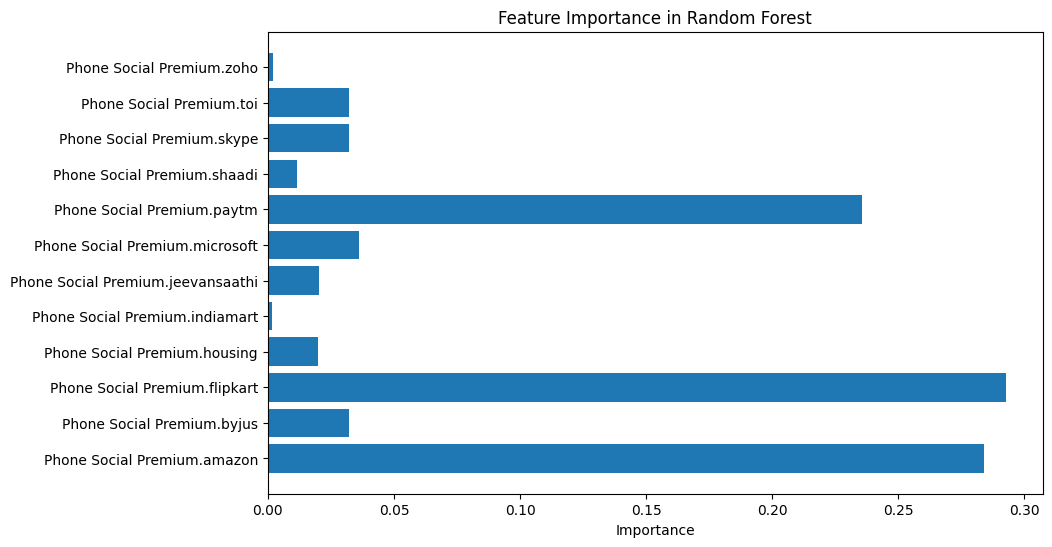

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


binary_columns = [
    'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
    'Phone Social Premium.housing', 'Phone Social Premium.indiamart', 'Phone Social Premium.jeevansaathi',
    'Phone Social Premium.microsoft', 'Phone Social Premium.paytm', 'Phone Social Premium.shaadi',
    'Phone Social Premium.skype', 'Phone Social Premium.toi', 'Phone Social Premium.zoho'
]

df_temp = df_train.copy()
df_temp = df_temp.dropna(subset=binary_columns )

value_mapping = {
    'Very Low': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Very High': 5
}
df_temp['phone_phoneFootprintStrengthOverall'] = df_temp['phone_phoneFootprintStrengthOverall'].map(value_mapping)

X = df_temp[binary_columns]
y = df_temp['phone_phoneFootprintStrengthOverall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
plt.barh(binary_columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


In [48]:
df_train = df_train.drop(columns=binary_columns)

In [49]:

mode_by_age = df_train.groupby('AGE')['MARITAL STATUS'].agg(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
def fill_marital_status(row):
    if pd.isna(row['MARITAL STATUS']):
        return mode_by_age.get(row['AGE'], pd.NA)
    return row['MARITAL STATUS']

df_train['MARITAL STATUS'] = df_train.apply(fill_marital_status, axis=1)



In [50]:
most_frequent_value = df_train['MARITAL STATUS'].mode()[0]

df_train['MARITAL STATUS'].fillna(most_frequent_value, inplace=True)

<Axes: xlabel='AGE', ylabel='MARITAL STATUS'>

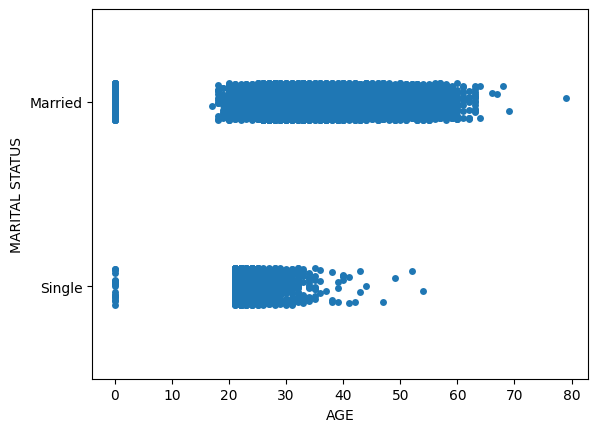

In [51]:

sns.stripplot(x='AGE', y='MARITAL STATUS', data=df_train)


In [52]:
unique_combinations = df_train.groupby(['EMPLOY CONSTITUTION', 'EMPLOYER TYPE']).size().reset_index(name='Count')
print(unique_combinations)

  EMPLOY CONSTITUTION   EMPLOYER TYPE  Count
0            SALARIED      Government     23
1            SALARIED  Non-Government    152
2            SALARIED        SALARIED   1354
3            SALARIED   SELF-EMPLOYED      1
4       SELF-EMPLOYED   SELF-EMPLOYED   3471


In [53]:
df_train['EMPLOY_CONSTITUTION_TYPE'] = df_train['EMPLOY CONSTITUTION'] + '_' + df_train['EMPLOYER TYPE']


<Axes: xlabel='Cibil Score', ylabel='Count'>

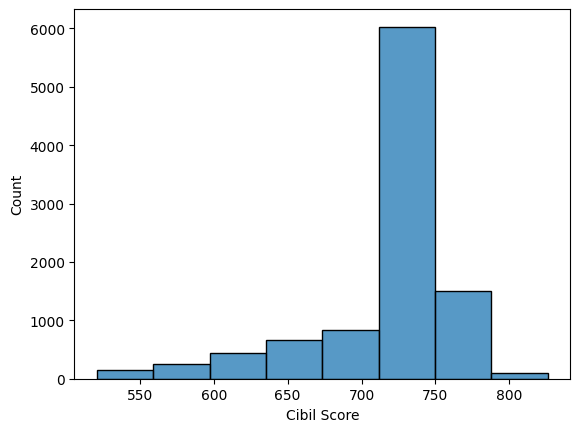

In [54]:
import seaborn as sns
sns.histplot(df_train['Cibil Score'],bins=8)


In [55]:
df_train.drop(columns=['EMPLOY CONSTITUTION','EMPLOYER TYPE'],inplace=True)

In [56]:
df_train['EMPLOY_CONSTITUTION_TYPE'].fillna('UNKNOWN', inplace=True)

In [57]:
approved_df = df_train[df_train['Application Status'] == 'APPROVED']

null_count = approved_df['EMPLOY_CONSTITUTION_TYPE'].isnull().sum()

print(f"Number of times EMPLOY_CONSTITUTION_TYPE is null and Application Status is APPROVED: {null_count}")

Number of times EMPLOY_CONSTITUTION_TYPE is null and Application Status is APPROVED: 0


In [58]:
df_train.isnull().sum()

,0
Cibil Score,0
TOTAL ASSET COST,0
ASSET CTG,0
APPLIED AMOUNT,0
MARITAL STATUS,0
GENDER,0
AGE,0
phone_digitalage,0
phone_nameMatchScore,0
phone_phoneFootprintStrengthOverall,0


In [59]:
df_train.shape

(9994, 12)

In [60]:
df_train_copy=df_train.copy()

In [61]:
df_train_copy.isnull().sum()

,0
Cibil Score,0
TOTAL ASSET COST,0
ASSET CTG,0
APPLIED AMOUNT,0
MARITAL STATUS,0
GENDER,0
AGE,0
phone_digitalage,0
phone_nameMatchScore,0
phone_phoneFootprintStrengthOverall,0


In [62]:
encoded_df=pd.DataFrame()

In [63]:
footprint_strength_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

encoded_df['phone_phoneFootprintStrengthOverall'] = df_train_copy['phone_phoneFootprintStrengthOverall'].map(footprint_strength_mapping)

In [64]:
marital_status_map = {'Married': 1, 'Single': 0}
application_status_map = {'APPROVED': 1, 'DECLINED': 0}

encoded_df['MARITAL STATUS'] = df_train_copy['MARITAL STATUS'].map(marital_status_map)
encoded_df['Application Status'] = df_train_copy['Application Status'].map(application_status_map)

In [65]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(df_train_copy[['ASSET CTG', 'GENDER', 'EMPLOY_CONSTITUTION_TYPE']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['ASSET CTG', 'GENDER', 'EMPLOY_CONSTITUTION_TYPE']))
encoded_df.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(9994, 18)

In [66]:
encoded_df.isnull().sum()

,0
ASSET CTG_ESECB,0
ASSET CTG_ESNRB,0
ASSET CTG_ESNRC,0
ASSET CTG_MCECA,0
ASSET CTG_MCECB,0
ASSET CTG_MCECC,0
ASSET CTG_MCEXA,0
ASSET CTG_MCEXB,0
ASSET CTG_MCPRA,0
ASSET CTG_MOECA,0


In [67]:
encoded_df.shape

(9994, 18)

In [68]:
df_train.to_csv('df_train.csv',index=False)

In [69]:
# import pandas as pd
# df=pd.read_csv('/content/df_train.csv')
# df.drop(columns=['combined_feature'],inplace=True)

In [70]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

footprint_strength_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

df['phone_phoneFootprintStrengthOverall'] = df['phone_phoneFootprintStrengthOverall'].map(footprint_strength_mapping)

columns_to_encode = ['ASSET CTG', 'GENDER', 'EMPLOY_CONSTITUTION_TYPE', 'MARITAL STATUS']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = pd.DataFrame(encoder.fit_transform(df[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))

df = df.drop(columns=columns_to_encode).reset_index(drop=True)
df_encoded = pd.concat([df, encoded_columns], axis=1)

scaler = StandardScaler()
columns_to_scale = ['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT', 'AGE', 'phone_digitalage', 'phone_nameMatchScore']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
print(df_encoded.isnull().sum())

X = df_encoded.drop(columns=['Application Status'])
y = df_encoded['Application Status'].map({'APPROVED': 1, 'DECLINED': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Cibil Score                                             0
TOTAL ASSET COST                                        0
APPLIED AMOUNT                                          0
AGE                                                     0
phone_digitalage                                        0
phone_nameMatchScore                                    0
phone_phoneFootprintStrengthOverall                     0
Application Status                                      0
ASSET CTG_ESECB                                         0
ASSET CTG_ESNRB                                         0
ASSET CTG_ESNRC                                         0
ASSET CTG_MCECA                                         0
ASSET CTG_MCECB                                         0
ASSET CTG_MCECC                                         0
ASSET CTG_MCEXA                                         0
ASSET CTG_MCEXB                                         0
ASSET CTG_MCPRA                                         0
ASSET CTG_MOEC

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {gb_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Model Accuracy: 0.8816

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       993
           1       0.90      0.92      0.91      2006

    accuracy                           0.88      2999
   macro avg       0.87      0.86      0.86      2999
weighted avg       0.88      0.88      0.88      2999



In [72]:
df_test=pd.read_csv('/content/Assignment_Test.csv')

In [73]:

mode_value = df_test['phone_phoneFootprintStrengthOverall'].mode()[0]

df_test['phone_phoneFootprintStrengthOverall'].fillna(mode_value, inplace=True)

df_test.isnull().sum()

,0
UID,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,0
HDB BRANCH STATE,172
FIRST NAME,0
MIDDLE NAME,1405
LAST NAME,131
mobile,0
AADHAR VERIFIED,0


In [74]:
from sklearn.impute import SimpleImputer
import pandas as pd

def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col >= lower_bound) & (col <= upper_bound)]

df_test['Cibil Score'] = pd.to_numeric(df_test['Cibil Score'], errors='coerce')

cibil_without_outliers = remove_outliers(df_test['Cibil Score'])

median_cibil = cibil_without_outliers.median()
df_test.loc[:, 'Cibil Score'] = df_test['Cibil Score'].fillna(median_cibil)

df_test.loc[:, 'Cibil Score'] = df_test['Cibil Score'].astype(int)

asset_without_outliers = remove_outliers(df_test['TOTAL ASSET COST'])

median_asset = asset_without_outliers.median()
df_test.loc[:, 'TOTAL ASSET COST'] = df_test['TOTAL ASSET COST'].fillna(median_asset)
df_test.isnull().sum()


,0
UID,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,0
HDB BRANCH STATE,172
FIRST NAME,0
MIDDLE NAME,1405
LAST NAME,131
mobile,0
AADHAR VERIFIED,0


In [75]:

imputer = SimpleImputer(strategy='most_frequent')
df_test['ASSET CTG'] = imputer.fit_transform(df_test[['ASSET CTG']]).ravel()

In [76]:

mode_by_age = df_test.groupby('AGE')['MARITAL STATUS'].agg(lambda x: x.mode()[0] if not x.mode().empty else pd.NA)
def fill_marital_status(row):
    if pd.isna(row['MARITAL STATUS']):
        return mode_by_age.get(row['AGE'], pd.NA)
    return row['MARITAL STATUS']

df_test['MARITAL STATUS'] = df_test.apply(fill_marital_status, axis=1)



In [77]:
most_frequent_value = df_test['MARITAL STATUS'].mode()[0]

df_test['MARITAL STATUS'].fillna(most_frequent_value, inplace=True)

In [78]:
df_test['EMPLOY_CONSTITUTION_TYPE'] = df_test['EMPLOY CONSTITUTION'] + '_' + df_test['EMPLOYER TYPE']

df_test.drop(columns=['EMPLOY CONSTITUTION','EMPLOYER TYPE'],inplace=True)

In [79]:
df_test['EMPLOY_CONSTITUTION_TYPE'].fillna('UNKNOWN', inplace=True)

In [80]:
df_test.shape

(2000, 54)

In [81]:
df_test['EMPLOY_CONSTITUTION_TYPE'].value_counts()

,count
EMPLOY_CONSTITUTION_TYPE,
UNKNOWN,994
SELF-EMPLOYED_SELF-EMPLOYED,708
SALARIED_SALARIED,262
SALARIED_Non-Government,32
SALARIED_Government,4


In [82]:
df_test.isnull().sum()

,0
UID,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,0
HDB BRANCH STATE,172
FIRST NAME,0
MIDDLE NAME,1405
LAST NAME,131
mobile,0
AADHAR VERIFIED,0


In [83]:
df_test.columns

Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOYER NAME', 'Pan Name', 'name', 'vpa', 'upi_name',
       'Phone Social Premium.a23games', 'Phone Social Premium.amazon',
       'Phone Social Premium.byjus', 'Phone Social Premium.flipkart',
       'Phone Social Premium.housing', 'Phone Social Premium.indiamart',
       'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       'Phone Social Premium.paytm', 'Phone Soc

In [84]:
footprint_strength_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

df_test['phone_phoneFootprintStrengthOverall'] = df_test['phone_phoneFootprintStrengthOverall'].map(footprint_strength_mapping)
columns_to_encode = ['ASSET CTG', 'GENDER', 'EMPLOY_CONSTITUTION_TYPE', 'MARITAL STATUS']
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns_test = pd.DataFrame(encoder.fit_transform(df_test[columns_to_encode]), columns=encoder.get_feature_names_out(columns_to_encode))
df_test = df_test.drop(columns=columns_to_encode).reset_index(drop=True)
df_encoded_test = pd.concat([df_test, encoded_columns_test], axis=1)
scaler = StandardScaler()
columns_to_scale = ['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT', 'AGE', 'phone_digitalage', 'phone_nameMatchScore']
df_encoded_test[columns_to_scale] = scaler.fit_transform(df_encoded_test[columns_to_scale])
df_encoded_test['EMPLOY_CONSTITUTION_TYPE_SALARIED_SELF-EMPLOYED'] = 0
X = df_encoded_test
X.isnull().sum()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0
UID,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,0
HDB BRANCH STATE,172
...,...
EMPLOY_CONSTITUTION_TYPE_SALARIED_SALARIED,0
EMPLOY_CONSTITUTION_TYPE_SELF-EMPLOYED_SELF-EMPLOYED,0
EMPLOY_CONSTITUTION_TYPE_UNKNOWN,0
MARITAL STATUS_Single,0


In [85]:
X['ASSET CTG_ESNRB'] = 0

In [86]:
X.shape

(2000, 69)

In [87]:
X.isnull().sum()

,0
UID,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,0
HDB BRANCH STATE,172
...,...
EMPLOY_CONSTITUTION_TYPE_SELF-EMPLOYED_SELF-EMPLOYED,0
EMPLOY_CONSTITUTION_TYPE_UNKNOWN,0
MARITAL STATUS_Single,0
EMPLOY_CONSTITUTION_TYPE_SALARIED_SELF-EMPLOYED,0


In [88]:

columns_order = [
    'Cibil Score',
    'TOTAL ASSET COST',
    'APPLIED AMOUNT',
    'AGE',
    'phone_digitalage',
    'phone_nameMatchScore',
    'phone_phoneFootprintStrengthOverall',
    'ASSET CTG_ESECB',
    'ASSET CTG_ESNRB',
    'ASSET CTG_ESNRC',
    'ASSET CTG_MCECA',
    'ASSET CTG_MCECB',
    'ASSET CTG_MCECC',
    'ASSET CTG_MCEXA',
    'ASSET CTG_MCEXB',
    'ASSET CTG_MCPRA',
    'ASSET CTG_MOECA',
    'ASSET CTG_SCECA',
    'ASSET CTG_SCEXA',
    'GENDER_Male',
    'EMPLOY_CONSTITUTION_TYPE_SALARIED_Non-Government',
    'EMPLOY_CONSTITUTION_TYPE_SALARIED_SALARIED',
    'EMPLOY_CONSTITUTION_TYPE_SALARIED_SELF-EMPLOYED',
    'EMPLOY_CONSTITUTION_TYPE_SELF-EMPLOYED_SELF-EMPLOYED',
    'EMPLOY_CONSTITUTION_TYPE_UNKNOWN',
    'MARITAL STATUS_Single'
]


X_test = X[columns_order]

predictions = gb_model.predict(X_test)
df_out = X[['UID']].copy()
df_out['Prediction'] = predictions
print(df_out)


                      UID  Prediction
0     1844045271814558464           1
1     1840349097823778816           1
2     1488102613362294272           1
3      555529923942874624           0
4     1010213070486150912           1
...                   ...         ...
1995  1595862360559879424           1
1996   879889749720017664           1
1997   242909456443720192           0
1998   138725642700761856           1
1999  1680321200653072640           1

[2000 rows x 2 columns]


In [89]:
df_out['Prediction'].value_counts()

,count
Prediction,
1,1330
0,670


In [90]:
df_out.to_csv('output.csv',index=False)